<a href="https://colab.research.google.com/github/Parthshh19/Blackspot-Prediction-in-Victoria-/blob/main/Blackspot_Prediction_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blackspot Predicion using Machine Learning - Exploratory Data Analysis

Import Libraries

In [69]:
# Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

Importing Google Drive

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset

In [71]:
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Blackspot.csv")

##Convert categorical data to numerical data

In [72]:
#convert categorical data to numerical
def coding_intersection(x):
    if x=='Intersection': return 1
    if x=='non-Intersection': return 0

records['intersection'] = records['Intersection'].apply(coding_intersection)

def coding_blackspot(x):
    if x=='Blackspot': return 1
    if x=='non-Blackspot': return 0

records['blackspot'] = records['Blackspot'].apply(coding_blackspot)

def coding_ROAD_TYPE(x):
    if x=='DRIVE': return 1
    if x=='FREEWAY': return 2
    if x=='HIGHWAY': return 3
    if x=='ROAD': return 4
    if x=='STREET': return 5
    if x=='WAY': return 6

records['road_type'] = records['ROAD_TYPE'].apply(coding_ROAD_TYPE)

## Inspect missing data

Both Lq_Licenses and AGE_65YRS_OVER_PCNT are skewed so replace missing data with median.

In [73]:
records['AGE_65YRS_OVER_PCNT'].fillna(records['AGE_65YRS_OVER_PCNT'].median(),inplace=True)
records['Lq_Licenses'].fillna(records['Lq_Licenses'].median(), inplace=True)


##Set formatting for floating numbers

In [74]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data analysis

In [75]:
#overview of data
records.describe()


,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal,intersection,blackspot,road_type
count,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,...,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000
mean,4996.381,0.175,0.100,0.203,0.307,0.774,0.202,0.885,0.444,0.401,...,0.375,0.378,0.013,0.026,0.005,0.127,0.022,0.125,0.106,4.059
std,2885.736,0.051,0.031,0.055,0.068,0.102,0.105,0.107,0.106,0.115,...,0.432,1.550,0.111,0.158,0.067,0.334,0.148,0.331,0.308,0.934
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2477.000,0.145,0.080,0.172,0.274,0.752,0.149,0.871,0.387,0.342,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
50%,5020.500,0.177,0.102,0.197,0.317,0.779,0.181,0.897,0.450,0.407,...,0.081,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,7478.750,0.206,0.123,0.234,0.348,0.816,0.237,0.928,0.500,0.477,...,0.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
max,9999.000,0.329,0.198,0.609,0.491,1.000,1.000,1.000,1.088,0.786,...,1.000,26.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,6.000


In [76]:
#overview of data
records.describe()


,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal,intersection,blackspot,road_type
count,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,...,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000
mean,4996.381,0.175,0.100,0.203,0.307,0.774,0.202,0.885,0.444,0.401,...,0.375,0.378,0.013,0.026,0.005,0.127,0.022,0.125,0.106,4.059
std,2885.736,0.051,0.031,0.055,0.068,0.102,0.105,0.107,0.106,0.115,...,0.432,1.550,0.111,0.158,0.067,0.334,0.148,0.331,0.308,0.934
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2477.000,0.145,0.080,0.172,0.274,0.752,0.149,0.871,0.387,0.342,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
50%,5020.500,0.177,0.102,0.197,0.317,0.779,0.181,0.897,0.450,0.407,...,0.081,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,7478.750,0.206,0.123,0.234,0.348,0.816,0.237,0.928,0.500,0.477,...,0.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
max,9999.000,0.329,0.198,0.609,0.491,1.000,1.000,1.000,1.088,0.786,...,1.000,26.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,6.000


## Univariate analysis

Explore categorical Variables

In [77]:
print(records['ROAD_TYPE'].value_counts())
records['ROAD_TYPE'].describe()

ROAD_TYPE
ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: count, dtype: int64


,ROAD_TYPE
count,5326
unique,6
top,ROAD
freq,3400


In [78]:
print(records['Blackspot'].value_counts())
records['Blackspot'].describe()

Blackspot
non-Blackspot    4759
Blackspot         567
Name: count, dtype: int64


,Blackspot
count,5326
unique,2
top,non-Blackspot
freq,4759


In [79]:
print(records['Intersection'].value_counts())
records['Intersection'].describe()

Intersection
non-Intersection    4659
Intersection         667
Name: count, dtype: int64


,Intersection
count,5326
unique,2
top,non-Intersection
freq,4659


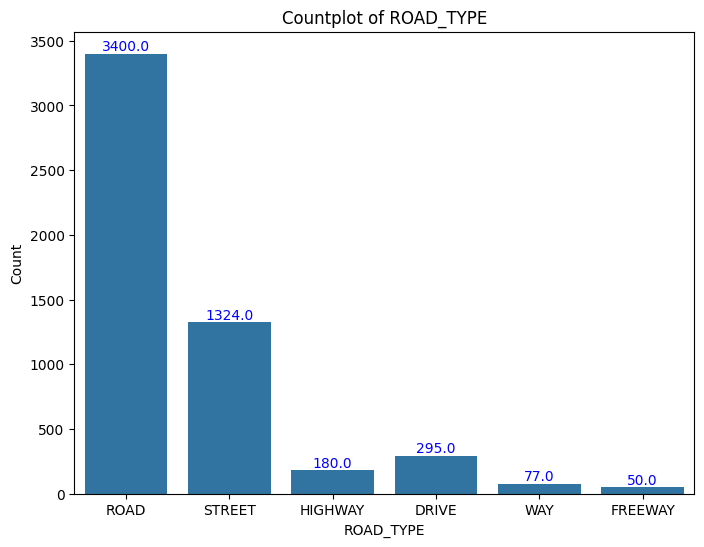

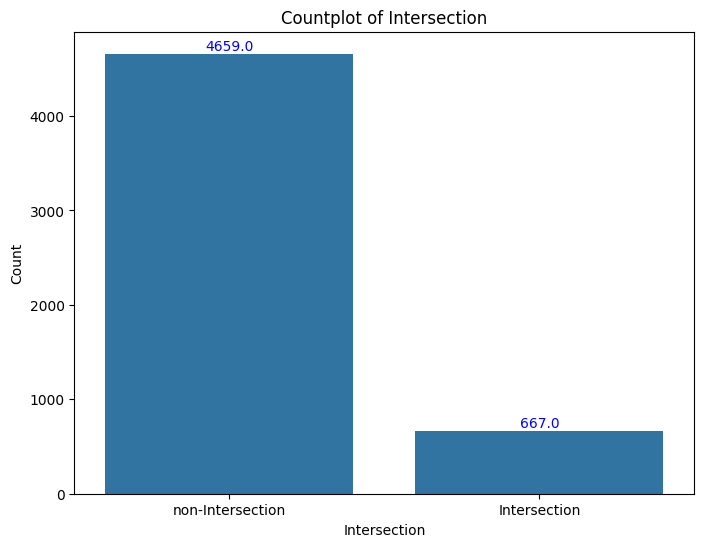

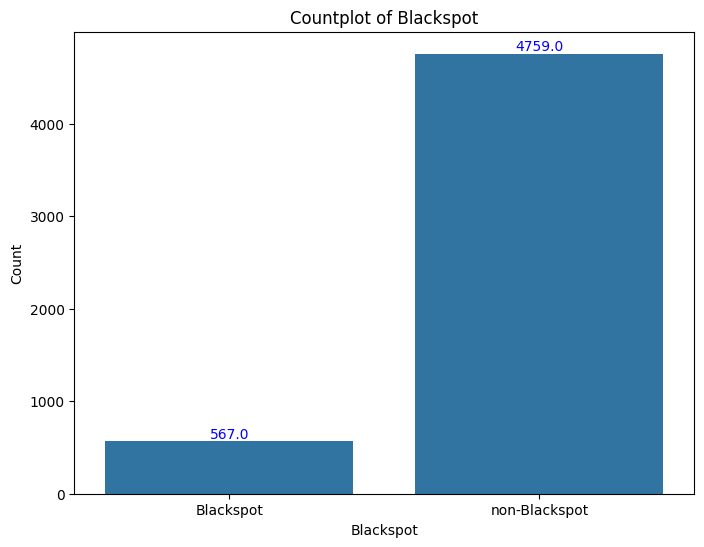

In [80]:
categorical_variables = ['ROAD_TYPE', 'Intersection', 'Blackspot']

for i in categorical_variables:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    ax = sns.countplot(x=records[i])

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='blue', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Countplot of {i}')
    plt.show()

Explore numerical variables

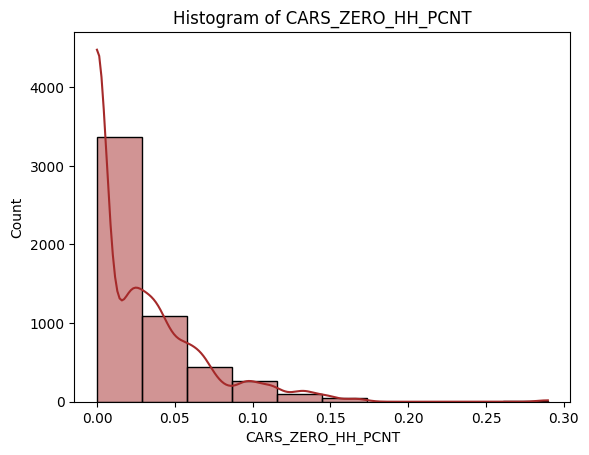

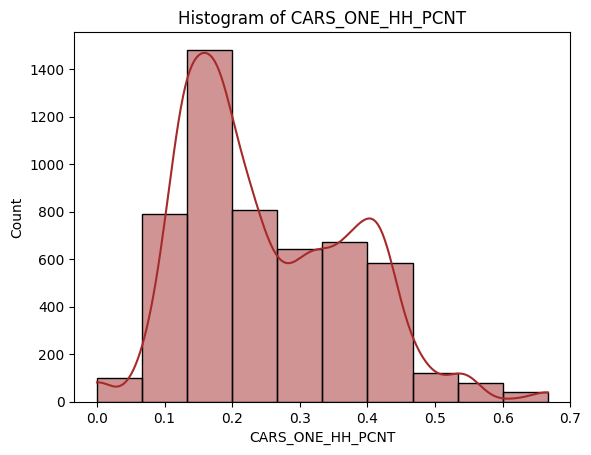

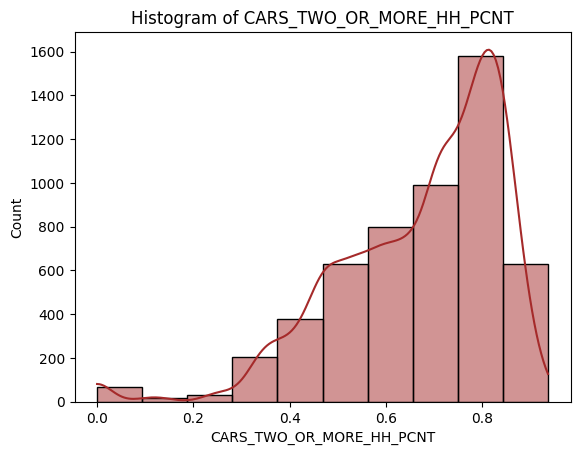

In [81]:
#Using histogram to plot numerical data
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the variables from the dataset
hist_variables = ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT']

# Display histograms using seaborn
for variable in hist_variables:
    sns.histplot(data=records, x=variable, bins= 10, kde= True, color='brown')
    plt.title(f"Histogram of {variable}")
    plt.show()


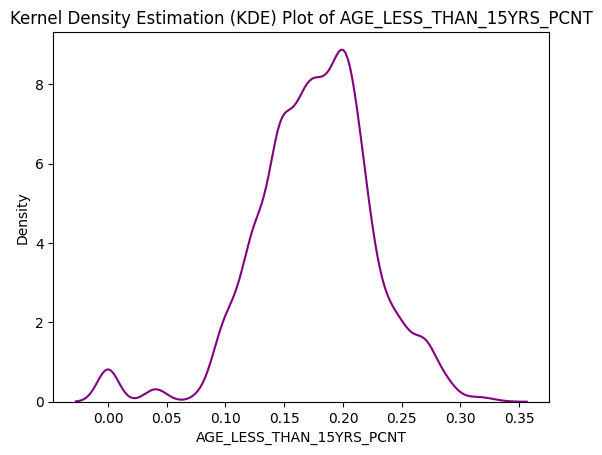

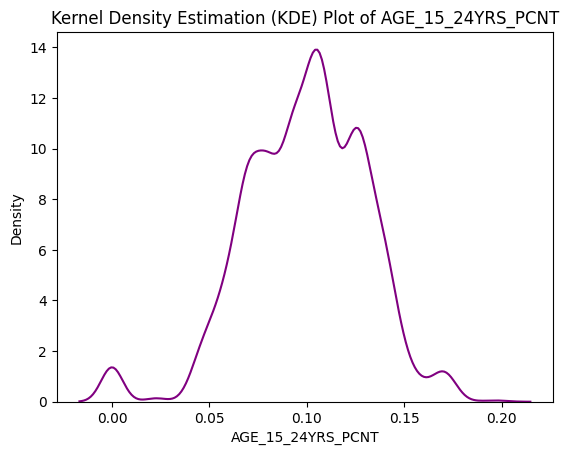

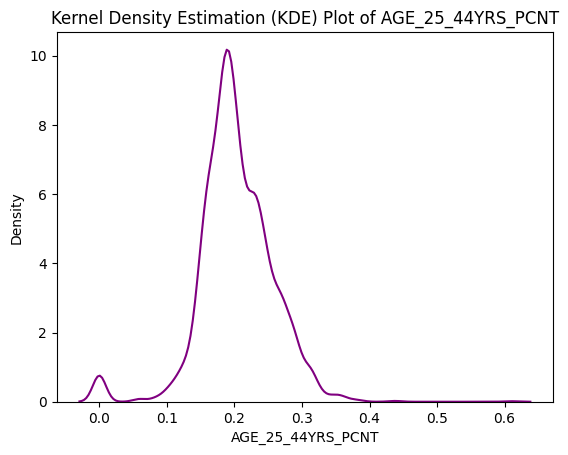

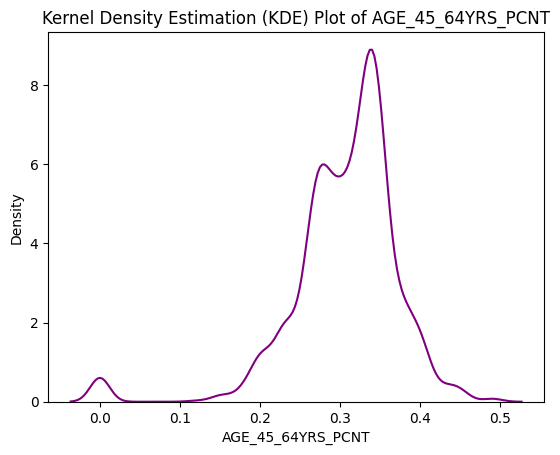

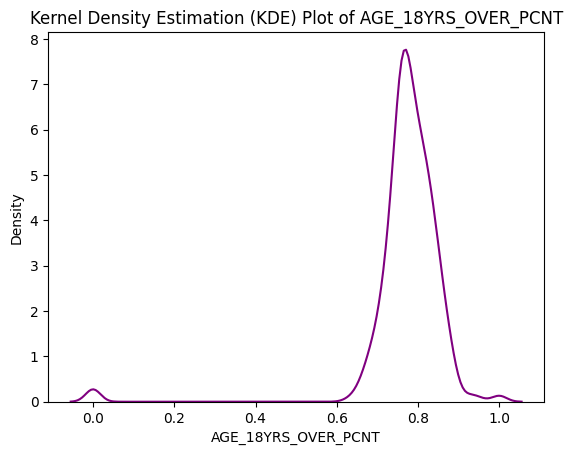

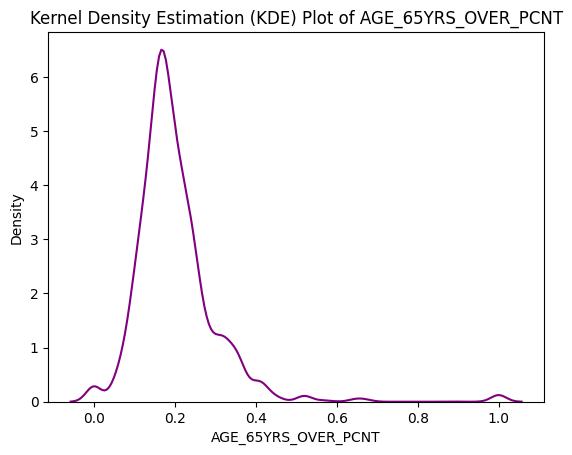

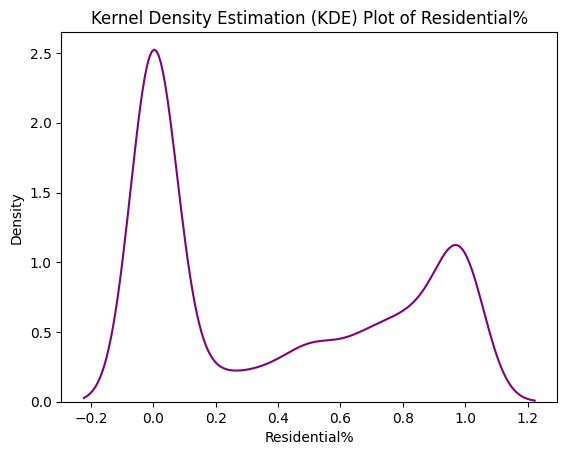

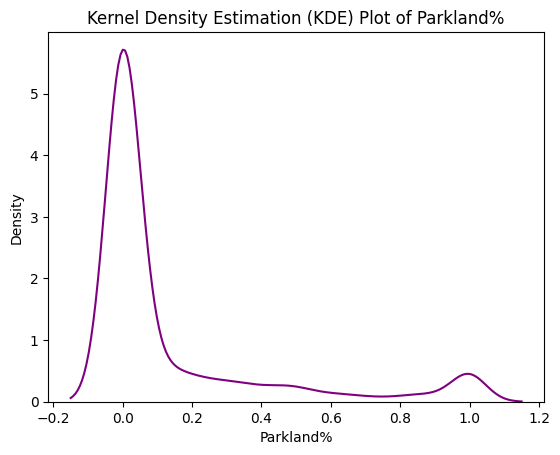

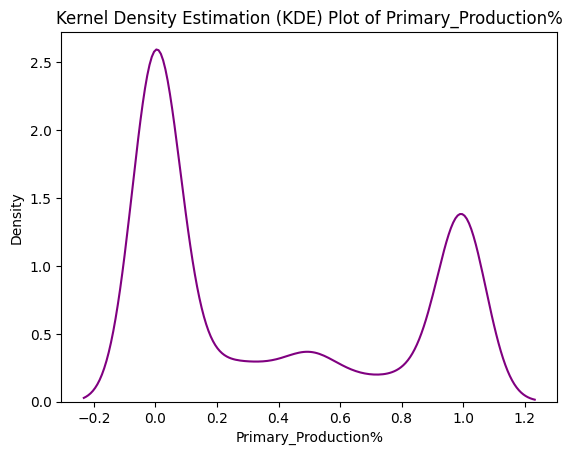

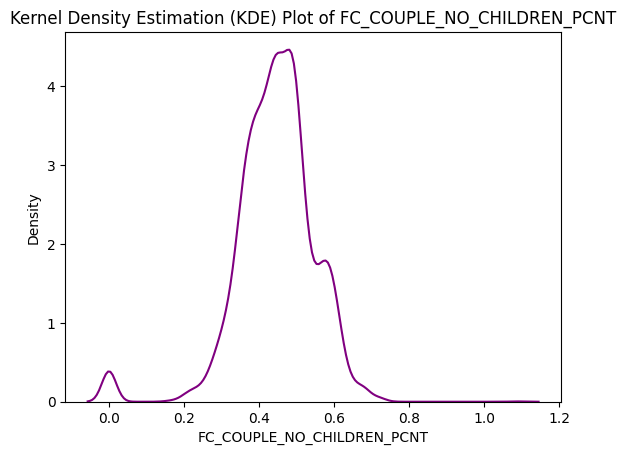

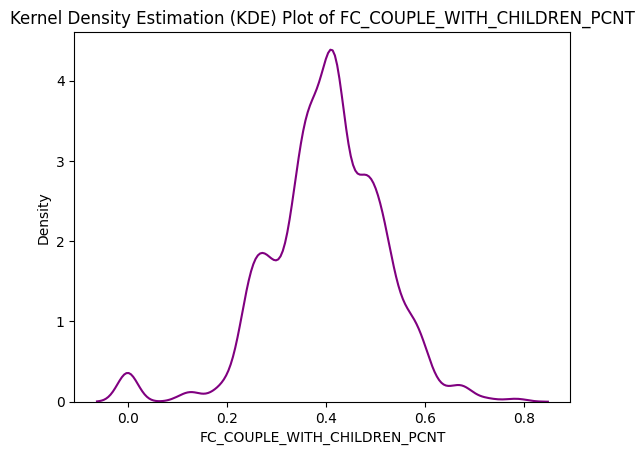

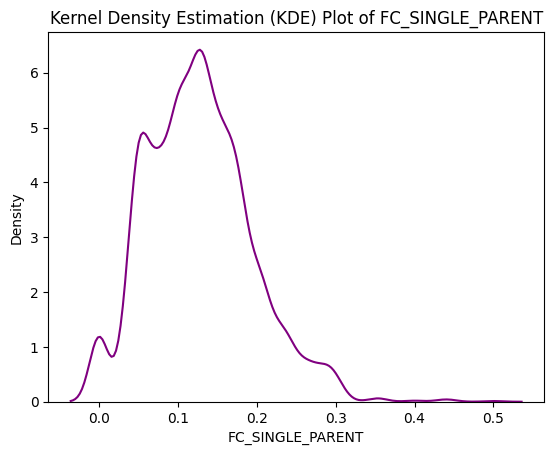

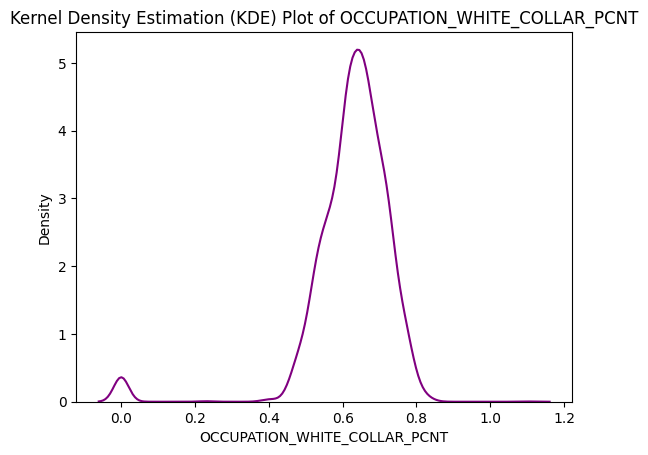

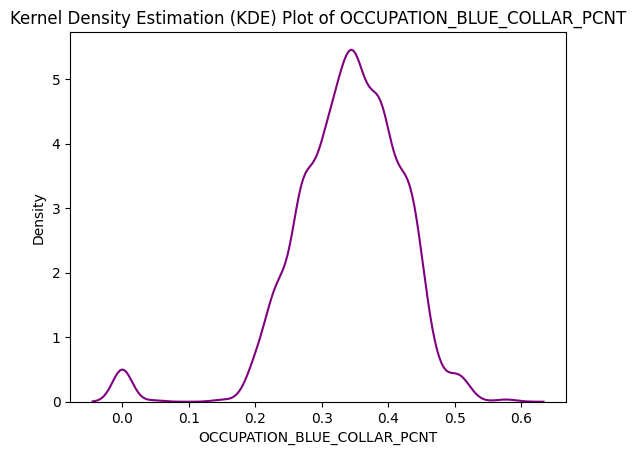

In [82]:
#Using kernel density estimation to plot numerical data
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the variables from the dataset
kde_variables = ['AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'Residential%',	'Parkland%',	'Primary_Production%', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT']

# Display kernel density estimation using seaborn
for variable in kde_variables:
    sns.kdeplot(data=records, x=variable, color= 'purple')
    plt.title(f"Kernel Density Estimation (KDE) Plot of {variable}")
    plt.show()


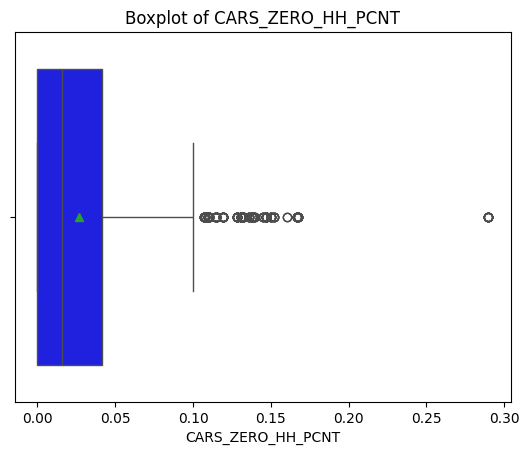

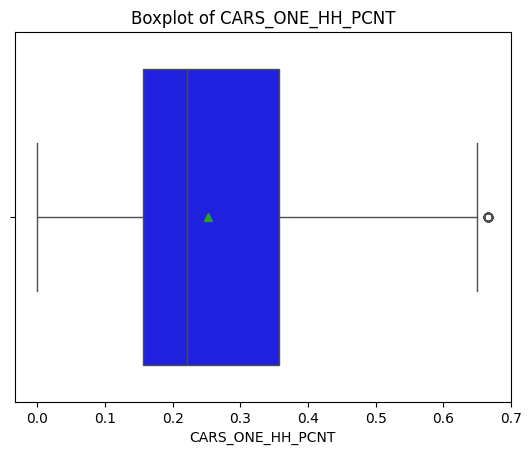

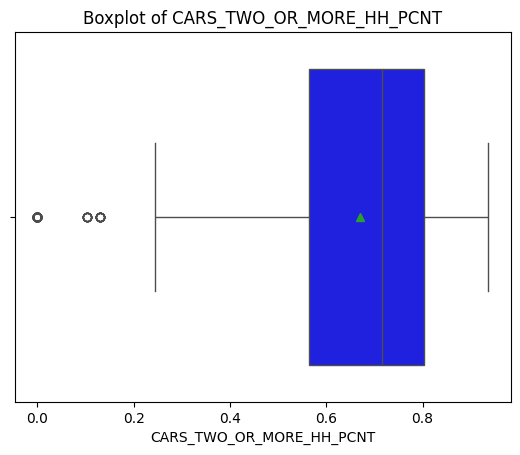

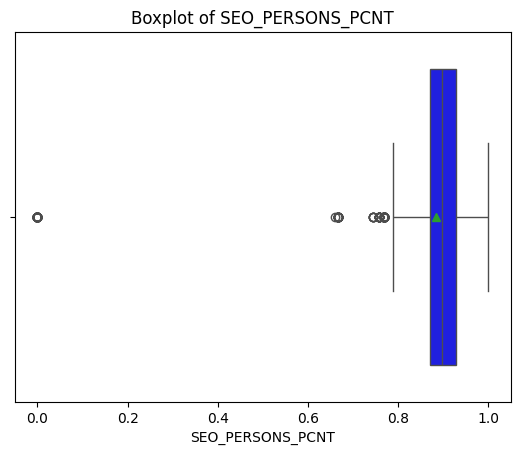

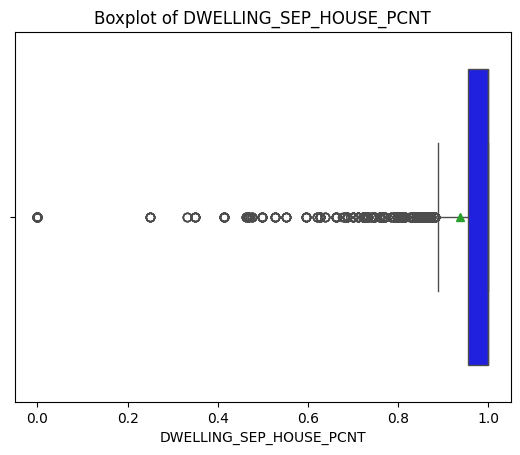

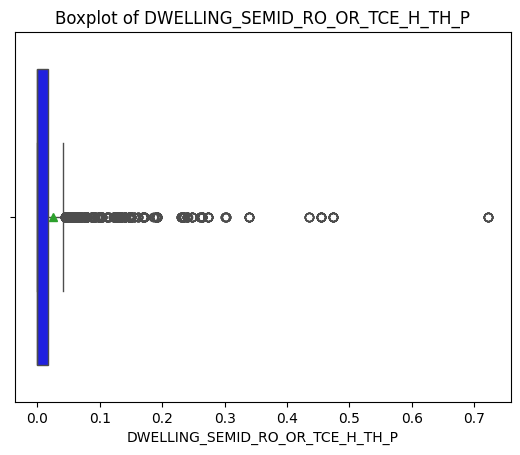

In [83]:
#Using box plot to plot numerical data
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the variables from the dataset
boxplot_variables = ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT', 'SEO_PERSONS_PCNT', 'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P']

# Display box plot using seaborn
for variable in boxplot_variables:
    sns.boxplot(data=records, x=variable, color='blue', showmeans=True)
    plt.title(f"Boxplot of {variable}")
    plt.show()

## Bivariate Analysis

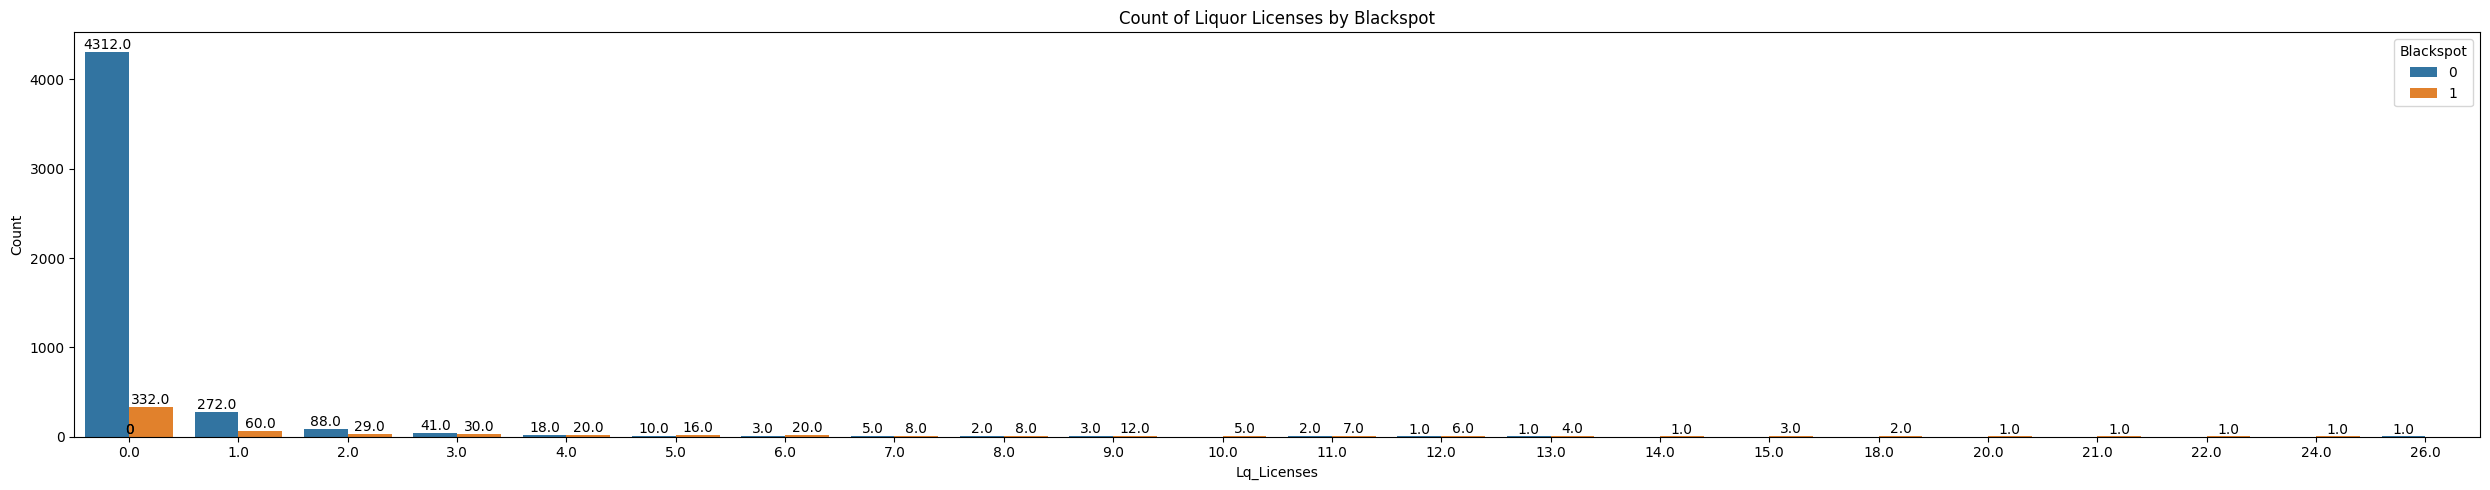

In [84]:
# Create the countplot
plt.figure(figsize=(25, 5))
ax = sns.countplot(data=records, x='Lq_Licenses', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Liquor Licenses by Blackspot')
plt.xlabel('Lq_Licenses')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

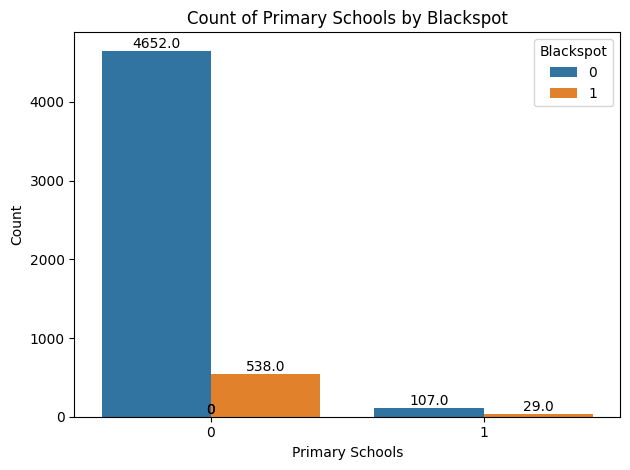

In [85]:
# Create the countplot
ax = sns.countplot(data=records, x='primary_school', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Primary Schools by Blackspot')
plt.xlabel('Primary Schools')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

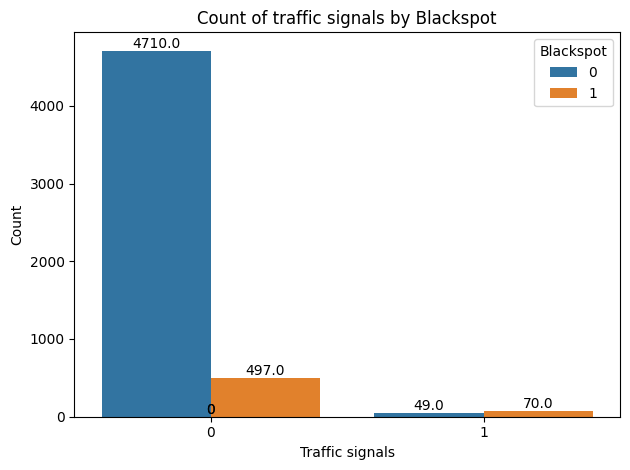

In [86]:
# Create the countplot
ax = sns.countplot(data=records, x='traffic_signal', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of traffic signals by Blackspot')
plt.xlabel('Traffic signals')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

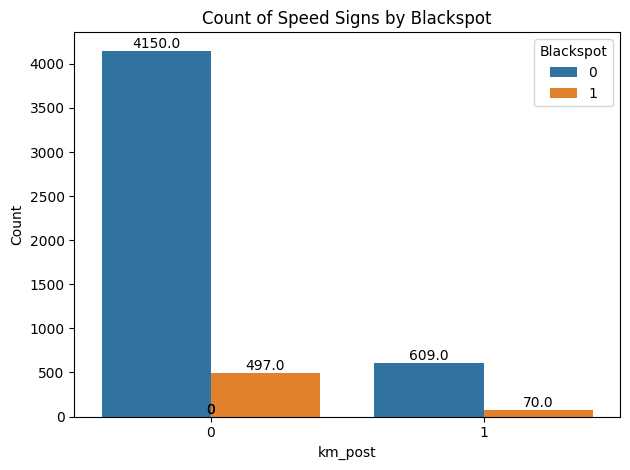

In [87]:
# Create the countplot
ax = sns.countplot(data=records, x='km_post', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Speed Signs by Blackspot')
plt.xlabel('km_post')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

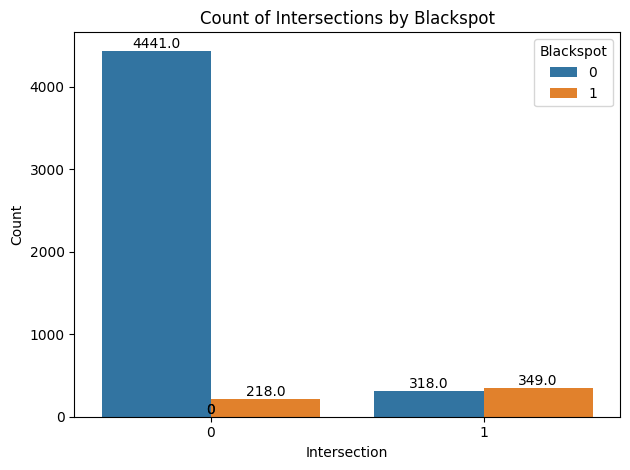

In [88]:
# Create the countplot
ax = sns.countplot(data=records, x='intersection', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Intersections by Blackspot')
plt.xlabel('Intersection')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

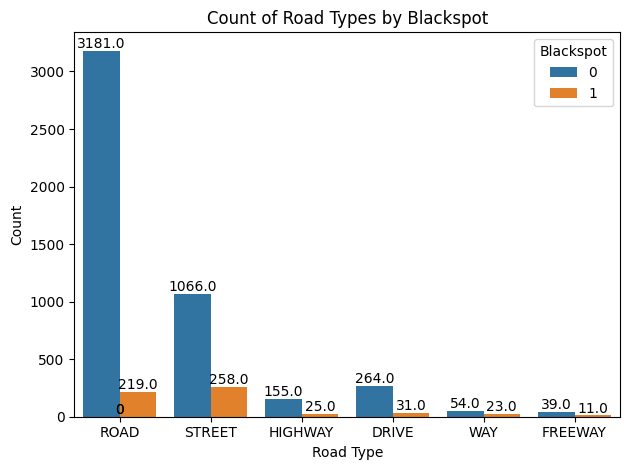

In [89]:
# Create the countplot
ax = sns.countplot(data=records, x='ROAD_TYPE', hue='blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Road Types by Blackspot')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

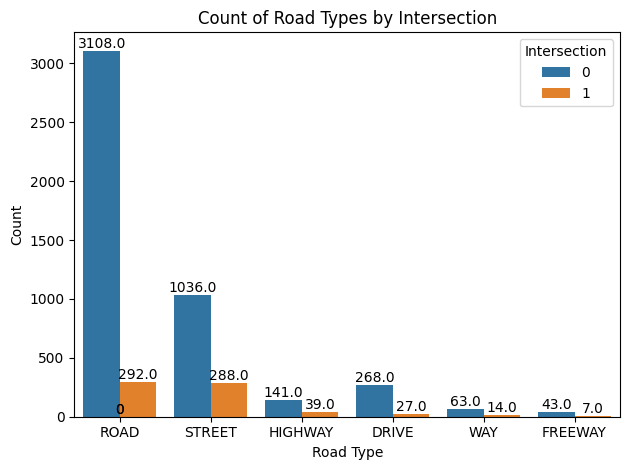

In [90]:
# Create the countplot
ax = sns.countplot(data=records, x='ROAD_TYPE', hue='intersection')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Road Types by Intersection')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Intersection')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

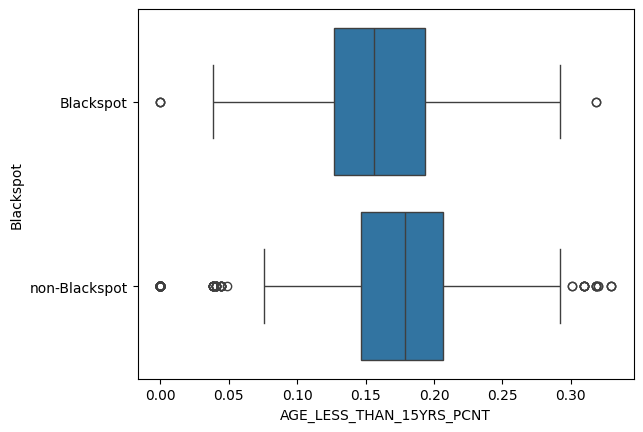

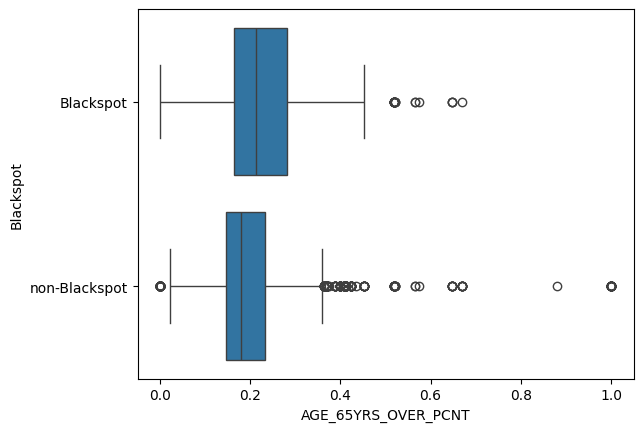

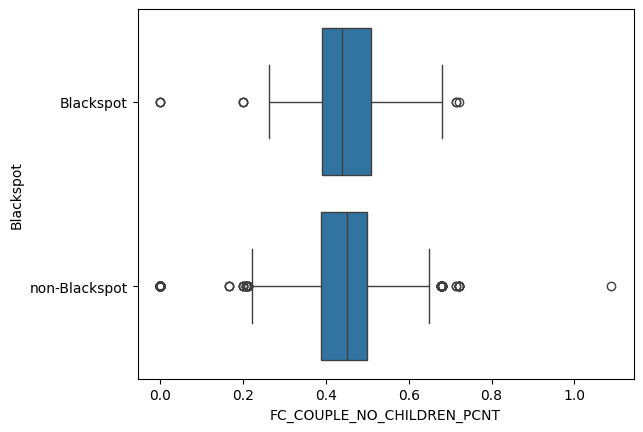

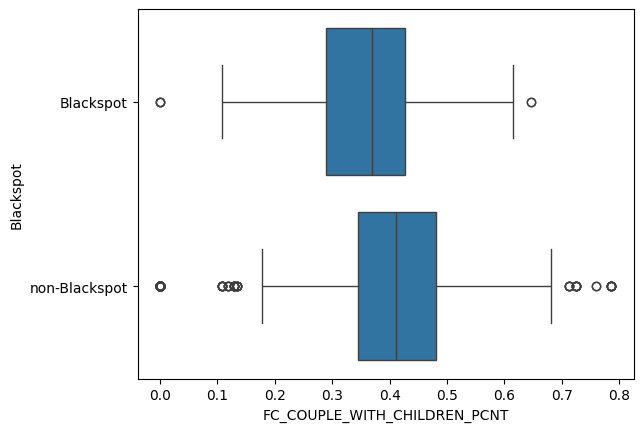

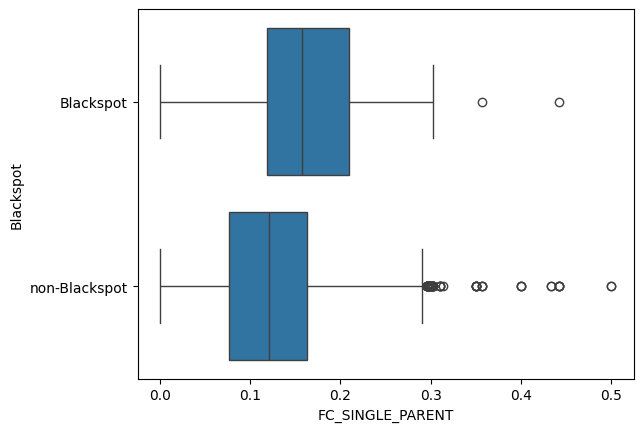

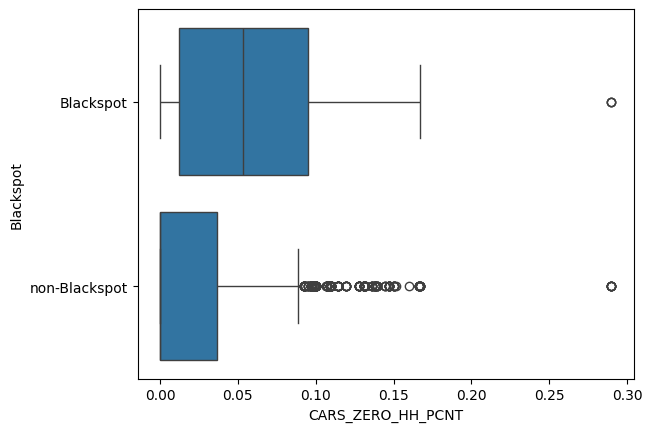

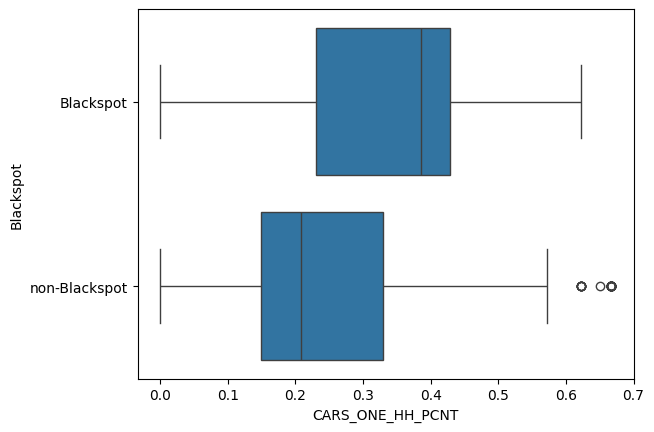

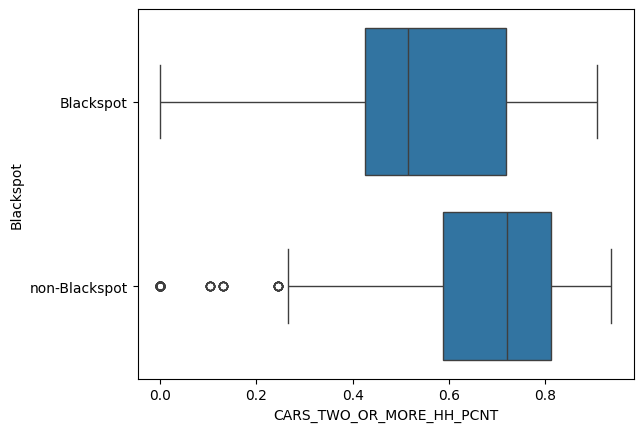

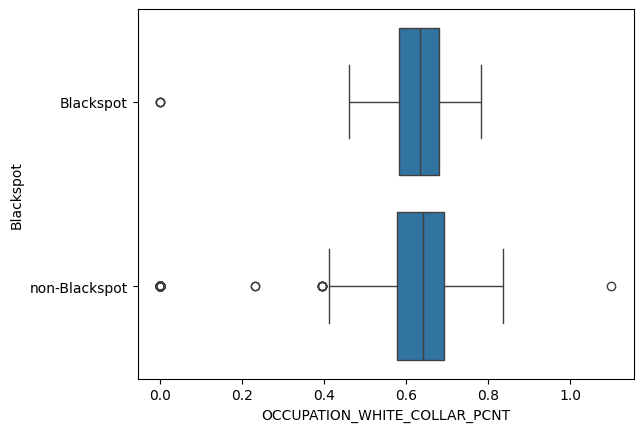

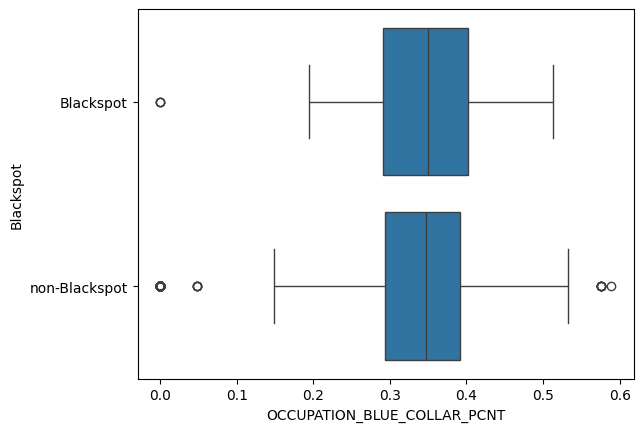

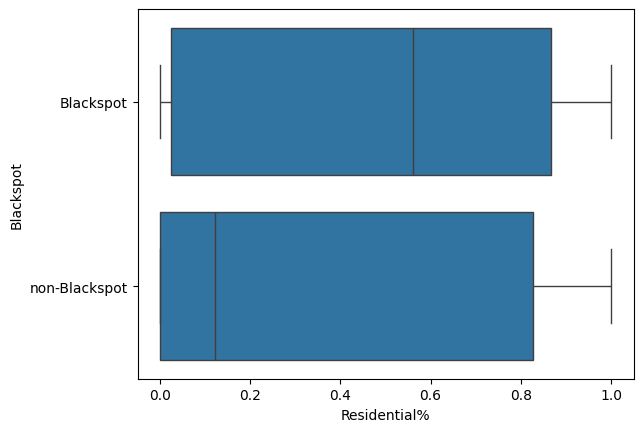

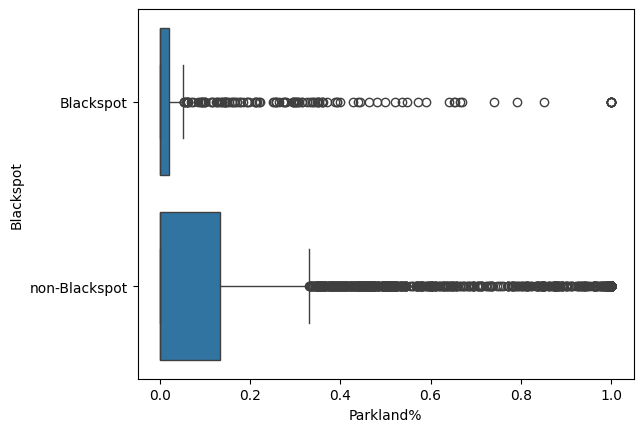

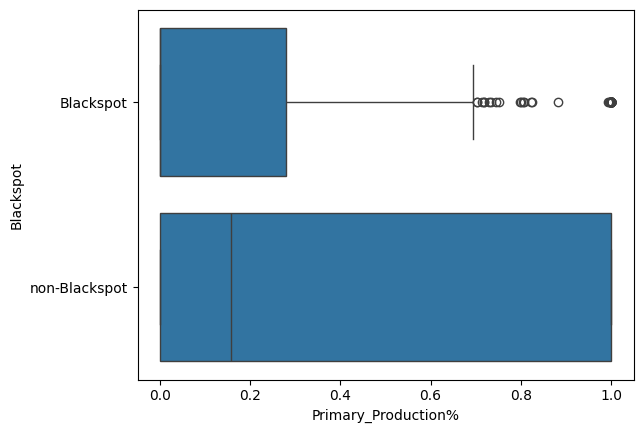

In [91]:
numerical_variables=[
    'AGE_LESS_THAN_15YRS_PCNT', 'AGE_65YRS_OVER_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT',
    'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT',
    'CARS_TWO_OR_MORE_HH_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT',
    'Residential%', 'Parkland%', 'Primary_Production%']
for i in numerical_variables:
    sns.boxplot(data= records, x=i, y= 'Blackspot')
    plt.show()

## Multivariate analysis

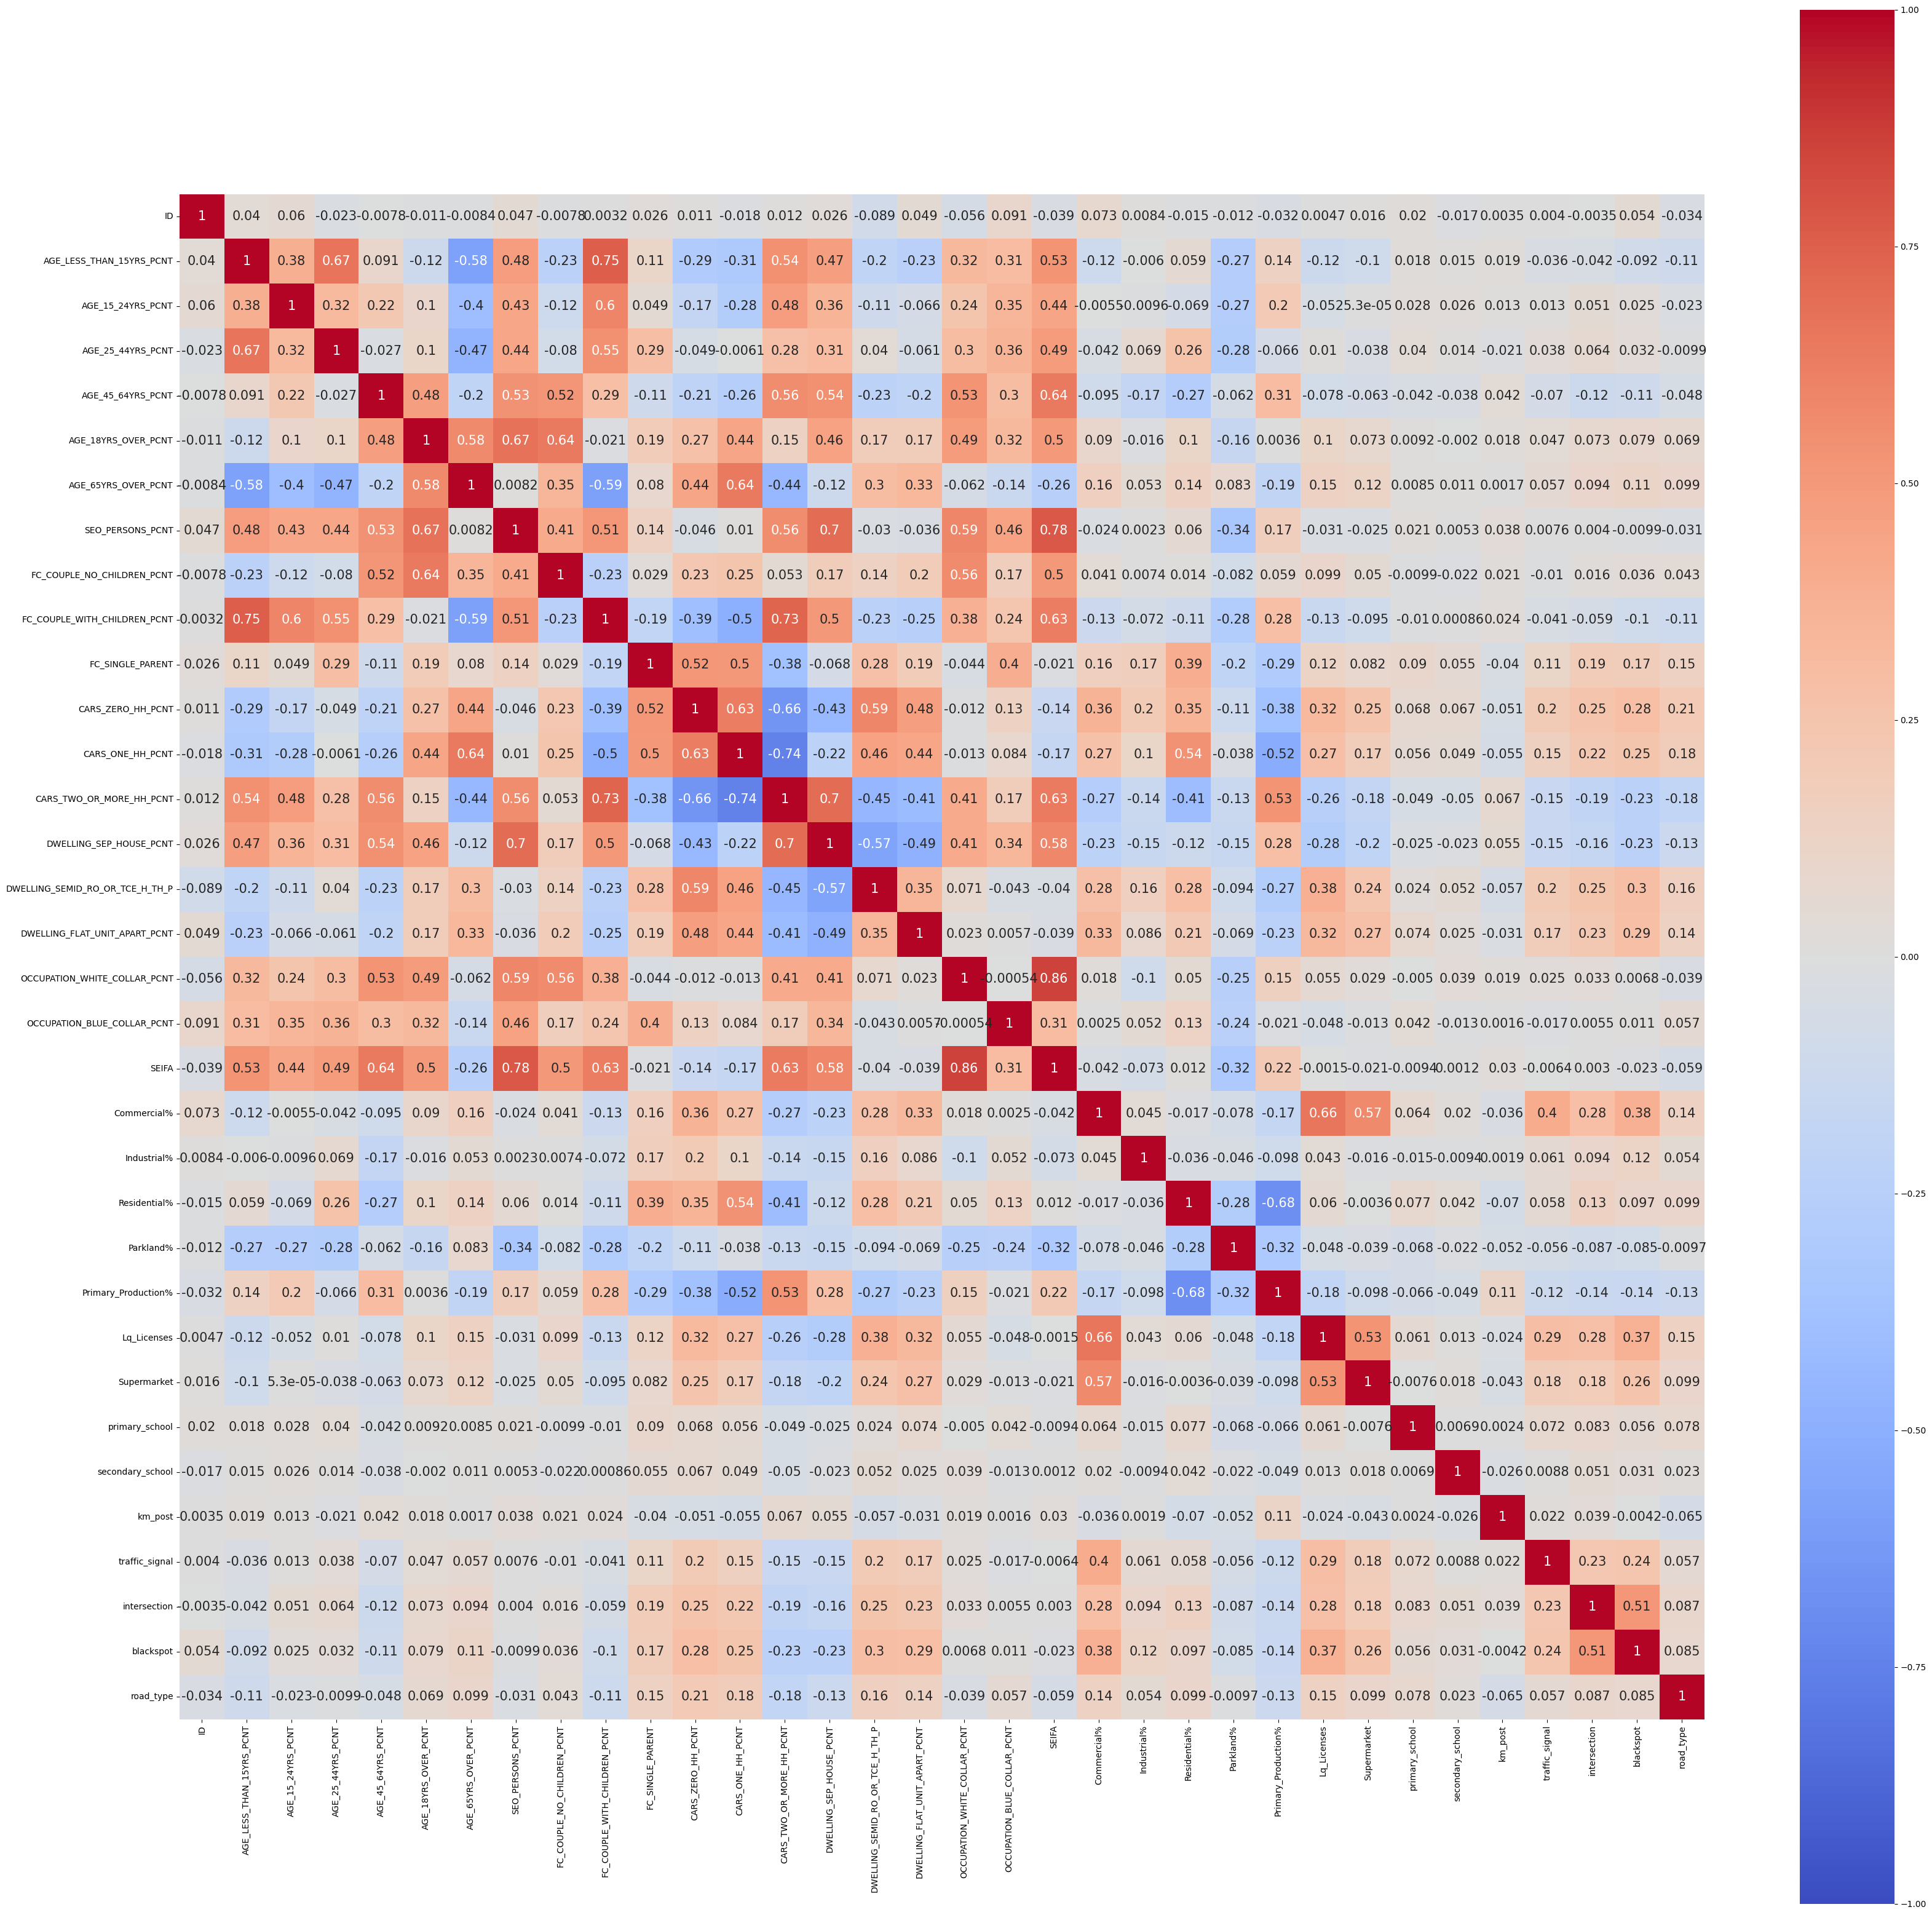

In [92]:
#generating heatmaps to explore relationships
plt.figure(figsize=(40,40))
# Select only numerical columns for correlation calculation
numerical_records = records.select_dtypes(include=['number'])
sns.heatmap(numerical_records.corr(), square=True, cmap='coolwarm', annot=True, vmin=-1, vmax=1, annot_kws={"size": 15})
plt.show()


In [95]:
# Calculate the correlation matrix on numerical data only
correlation_matrix = numerical_records.corr()

target_column = 'blackspot'

# Get the correlations of the target column with other columns
correlations_with_target = correlation_matrix[target_column]

# Find the top negatively correlated columns (excluding the target column itself)
top_negatively_correlated_columns = correlations_with_target.drop(target_column).sort_values(ascending=True)

# Print the top negatively correlated columns and their correlation values
print("Top negatively correlated columns for", target_column)
print(top_negatively_correlated_columns)

Top negatively correlated columns for blackspot
CARS_TWO_OR_MORE_HH_PCNT          -0.232
DWELLING_SEP_HOUSE_PCNT           -0.228
Primary_Production%               -0.142
AGE_45_64YRS_PCNT                 -0.109
FC_COUPLE_WITH_CHILDREN_PCNT      -0.100
AGE_LESS_THAN_15YRS_PCNT          -0.092
Parkland%                         -0.085
SEIFA                             -0.023
SEO_PERSONS_PCNT                  -0.010
km_post                           -0.004
OCCUPATION_WHITE_COLLAR_PCNT       0.007
OCCUPATION_BLUE_COLLAR_PCNT        0.011
AGE_15_24YRS_PCNT                  0.025
secondary_school                   0.031
AGE_25_44YRS_PCNT                  0.032
FC_COUPLE_NO_CHILDREN_PCNT         0.036
ID                                 0.054
primary_school                     0.056
AGE_18YRS_OVER_PCNT                0.079
road_type                          0.085
Residential%                       0.097
AGE_65YRS_OVER_PCNT                0.115
Industrial%                        0.120
FC_SINGLE